In [1]:
# Frozen convolutional base, re-initialized FC layer.
# No data augmentation.
# RMS Prop
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

base_model = models.load_model('/home/apando/models/tomnod_everything_relu_Adam.h5')

new_top_model = models.Sequential()
for layer in base_model.layers[:-4]:
    new_top_model.add(layer)
for layer in new_top_model.layers:
    layer.trainable = False
new_top_model.summary()

new_top_model.add(layers.Flatten(name='flatten1'))
new_top_model.add(layers.Dropout(0.5, name='dropout1'))
new_top_model.add(layers.Dense(512,activation='relu', name='dense1'))
new_top_model.add(layers.Dense(1, activation='sigmoid'))
new_top_model.summary()

# No data augmentation, on small clean dataset.
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/train/'
validation_dir = '/home/apando/datasets/building_crops_noaa_rezoom_des/validation/'
#test_dir = '/home/apando/datasets/building_crops_noaa_sample/test/'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir, 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

# Compile model
new_top_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# Train generator
history = new_top_model.fit_generator(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=100,
            validation_data=validation_generator,
            validation_steps=len(validation_generator))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

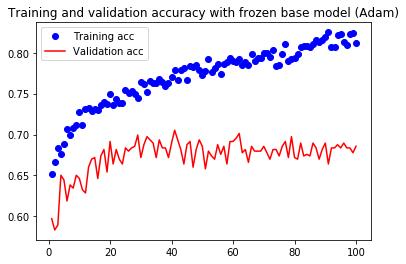

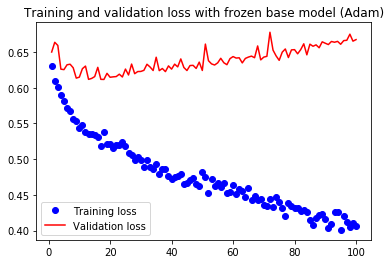

In [2]:
# Plot loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with frozen base model (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with frozen base model (Adam)')
plt.legend()

plt.show()